In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
# Reading the titanic csv file
df = pd.read_csv('train.csv')
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
# Displaying the name of columns in the titanic file.
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [20]:
# Checking the null values 
print(df.isnull().sum() >0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [21]:
# Handling null values in age by filling it middle value of ages.
df['Age'] = df['Age'].fillna(df['Age'].median())
print(df['Age'].isnull().sum())

0


In [7]:
# Handling the null values in Cabin by filling it with a value.
df['Cabin'] = df['Cabin'].fillna('Unknown value')
print(df['Cabin'].isnull().sum())

0


In [8]:
# Handling the null values in Embarked by filling it with forward fill.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].ffill())
print(df['Embarked'].isnull().sum())

0


In [9]:
# Checking if any null value is available.
print((df.isnull().sum()) > 0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool


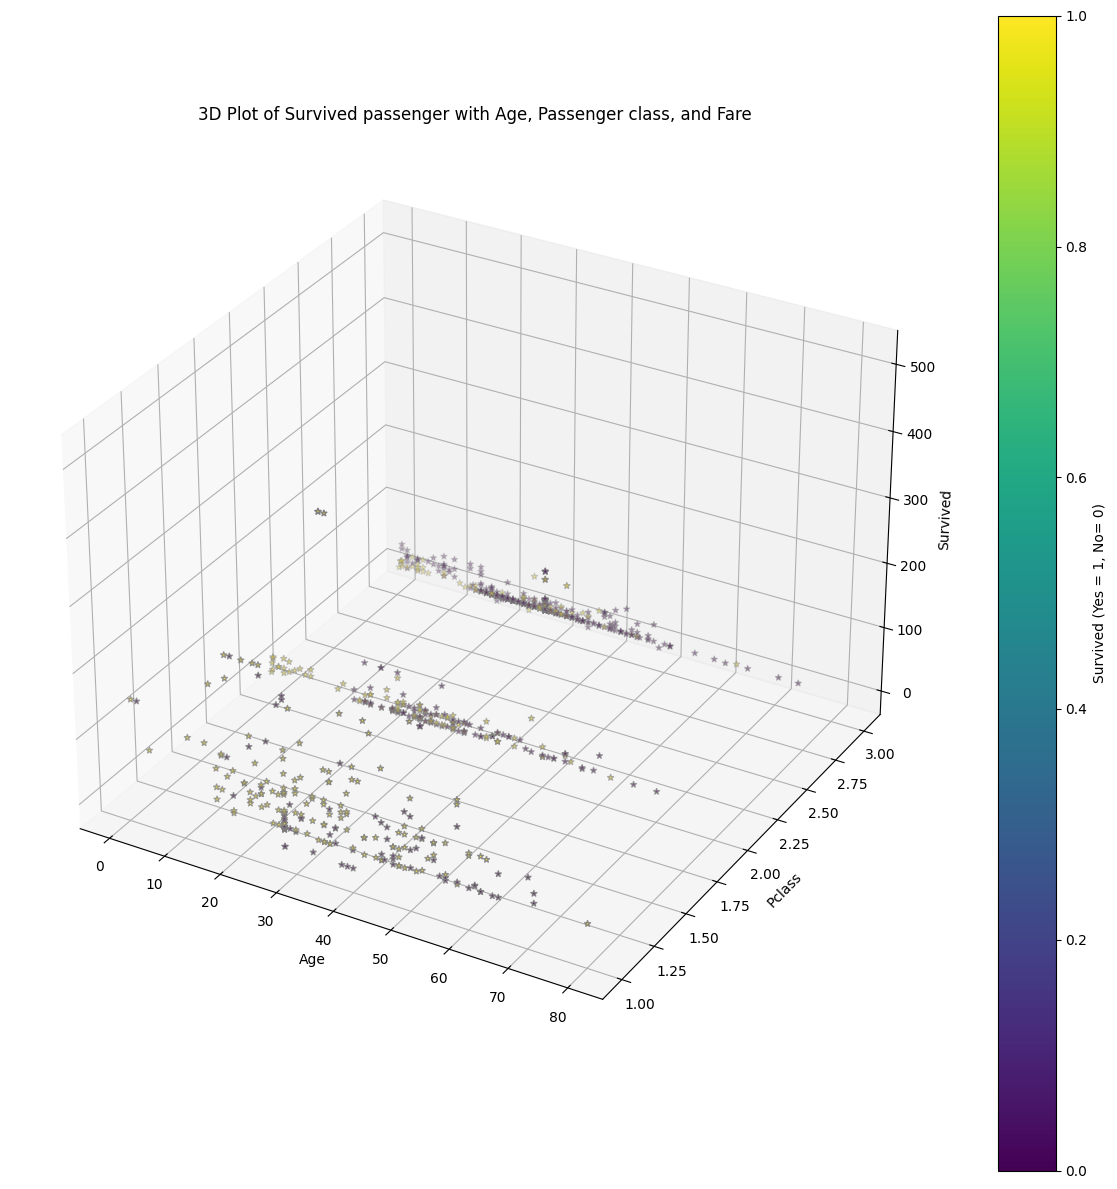

In [10]:
# creating 3d plot of gender, age and survived passengers
# creating the figure with the specified size
f = plt.figure(figsize=(15,15))
# Specifying the kind of plot
ax = f.add_subplot(111, projection = '3d')
# adding the values to the subplot. 
sca = ax.scatter(df['Age'], df['Pclass'], df['Fare'], c=df['Survived'], cmap= 'viridis', edgecolor= 'gray', marker = '*')

#creating a color bar for survived
cbar = plt.colorbar(sca)
cbar.set_label("Survived (Yes = 1, No= 0)")
#Specifying the labels
ax.set_xlabel('Age')
ax.set_ylabel('Pclass')
ax.set_zlabel('Survived')
ax.set_title("3D Plot of Survived passenger with Age, Passenger class, and Fare")
#showing the plot
plt.show()

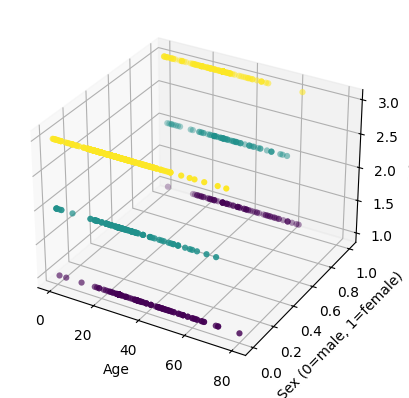

In [11]:
#creating 3d subplot of age, gender and passenger class

#creating the figure
f = plt.figure()
#Specifying the plot
ax = f.add_subplot(111, projection='3d')

#converting the sex to numeric values 
df['Sex_numeric'] = df['Sex'].map({"male" : 0, "female": 1})

# creating scatter plot and adding values to it
ax.scatter(df['Age'], df['Sex_numeric'], df['Pclass'], c=df['Pclass'], cmap='viridis', edgecolor='none')

#setting the labels 
ax.set_xlabel('Age')
ax.set_ylabel('Sex (0=male, 1=female)')
ax.set_zlabel('Pclass')

#showing the plot
plt.show()


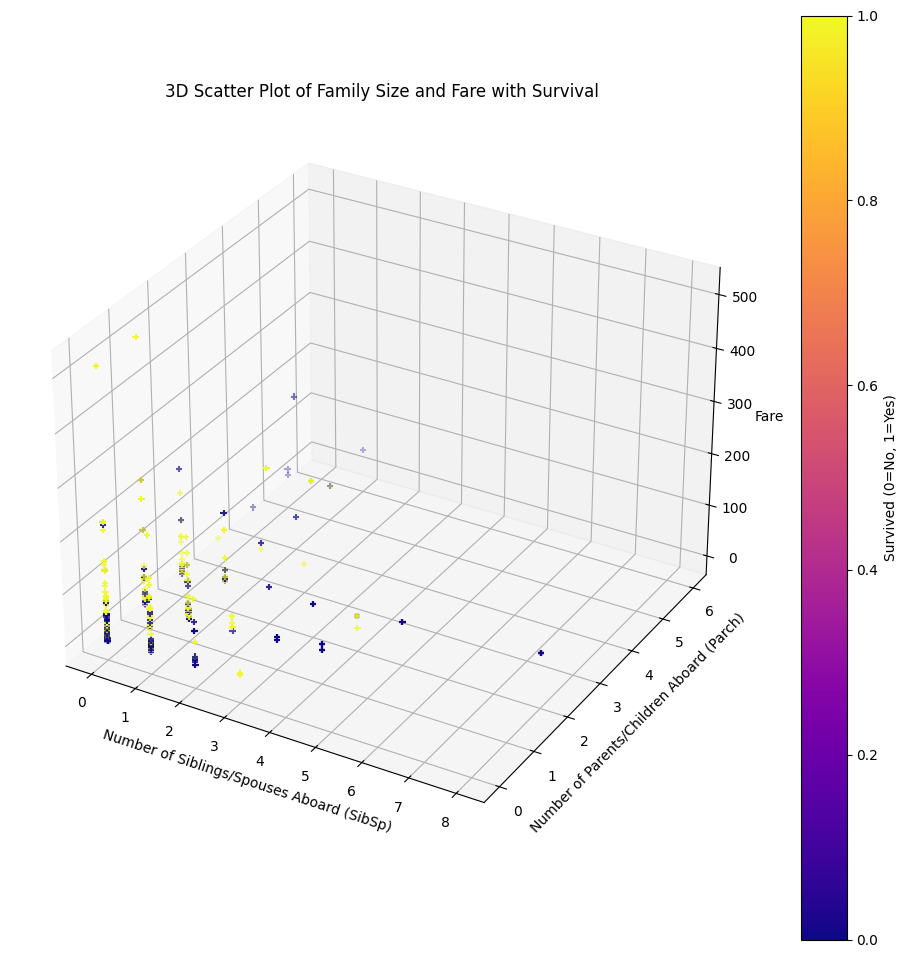

In [12]:
f = plt.figure(figsize= (12,12))
ax = f.add_subplot(111, projection='3d')

# Creating the scatter plot
scatter = ax.scatter(
    df['SibSp'], 
    df['Parch'], 
    df['Fare'], 
    c=df['Survived'],  # Color by survival
    cmap='plasma', 
    marker = '+',
   
)

# Adding a color bar for survival
cbar = plt.colorbar(scatter)
cbar.set_label('Survived (0=No, 1=Yes)')

# Setting labels of x, y, and z
ax.set_xlabel('Number of Siblings/Spouses Aboard (SibSp)')
ax.set_ylabel('Number of Parents/Children Aboard (Parch)')
ax.set_zlabel('Fare')

# setting the title
plt.title('3D Scatter Plot of Family Size and Fare with Survival')
# Showing the plot
plt.show()

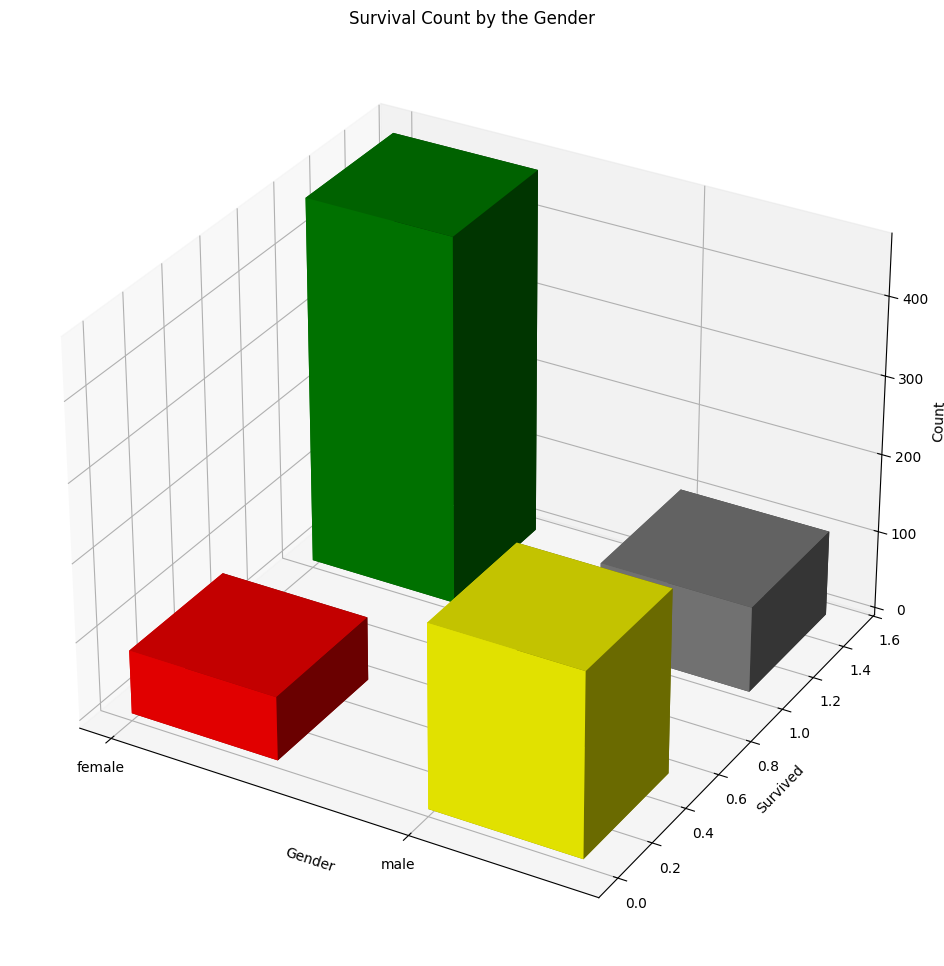

In [13]:
#creating a pivot table which will aggregate the sex, suvived passenger, passengerId. 
survival_counts = df.pivot_table(index = 'Sex', columns = 'Survived', values = 'PassengerId', aggfunc = 'count')

# creaitng the 3d figure
f = plt.figure(figsize = (12,12))
ax = f.add_subplot(111, projection = '3d')

# Creating the bar plot 
x = np.arange(len(survival_counts.index))
y = survival_counts.columns
x,y = np.meshgrid(x,y)
z = np.zeros_like(x)
#setting the width of the bars
dx = dy= 0.5
dz = survival_counts.values

#setting the color and lables
ax.bar3d(x.flatten(), y.flatten(), z.flatten(), dx, dy, dz.flatten(), color = ['red','yellow','green','gray'])
ax.set_xlabel('Gender')
ax.set_ylabel('Survived')
ax.set_zlabel('Count')
ax.set_xticks(np.arange(len(survival_counts.index)))
ax.set_xticklabels(survival_counts.index)

#setting the title
plt.title('Survival Count by the Gender')
# Showing the plot
plt.show()


                                 

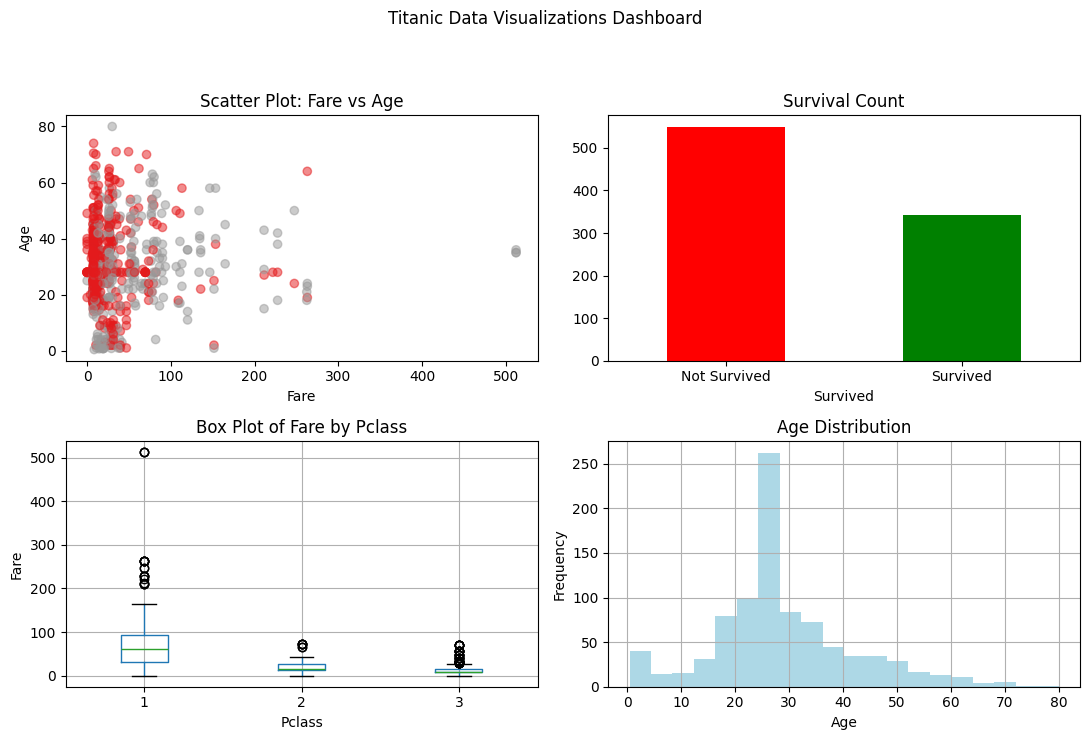

In [14]:
# Creating dashboard of subplots
fig, axs = plt.subplots(2,2,figsize= (11,7))  # 2 rows, 2 columns

# Scatter plot
axs[0, 0].scatter(df['Fare'], df['Age'], c=df['Survived'], cmap='Set1', alpha=0.5)
axs[0, 0].set_title('Scatter Plot: Fare vs Age')
axs[0, 0].set_xlabel('Fare')
axs[0, 0].set_ylabel('Age')


# Bar plot
count_of_survived = df['Survived'].value_counts()
count_of_survived.plot(kind='bar', ax=axs[0, 1], color=['red', 'green'])
axs[0, 1].set_title('Survival Count')
axs[0, 1].set_xticklabels(['Not Survived', 'Survived'], rotation=0)
 

# Box plot
df.boxplot(column='Fare', by='Pclass', ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Fare by Pclass')
axs[1, 0].set_ylabel('Fare')

# Histogram
df['Age'].hist(ax=axs[1, 1], bins=20, color='lightblue')
axs[1, 1].set_title('Age Distribution')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.suptitle('Titanic Data Visualizations Dashboard', y=1.05)
plt.show()

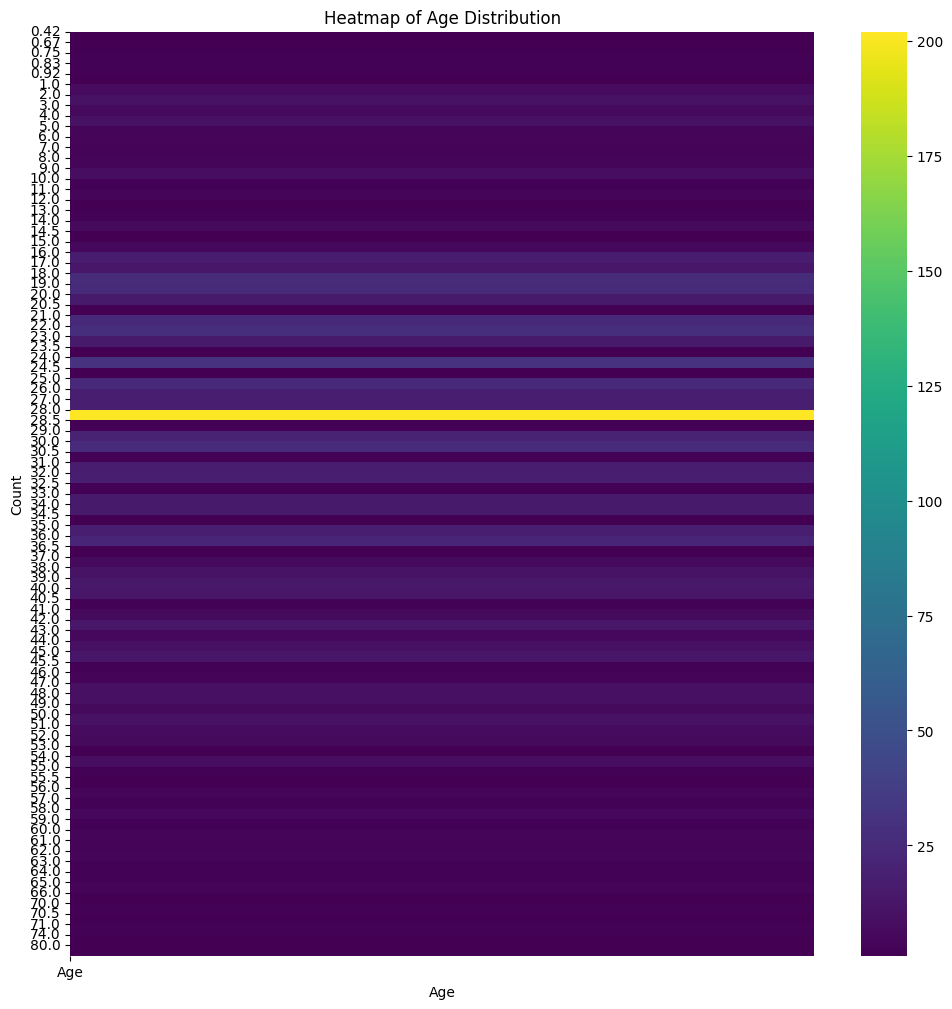

In [16]:
# Importing seaborn library 
import seaborn as sns
age_counts = df['Age'].value_counts().sort_index()  # Count occurrences of each age
heatmap_data = age_counts.values.reshape(-1, 1)  # Reshape for heatmap

# creating the figure with its size
plt.figure(figsize = (12,12))

# Heatmap 
sns.heatmap(heatmap_data, cmap='viridis', cbar=True)
#Setting the title for the Heapmap
plt.title('Heatmap of Age Distribution')
#Adding labels
plt.xlabel('Age')
plt.ylabel('Count')

plt.xticks(ticks=np.arange(0, 1), labels=['Age'], rotation=0)
plt.yticks(ticks=np.arange(len(age_counts)), labels=age_counts.index, rotation=0)

#Showing the plot
plt.show()